# Count Vector

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.linear_model import LogisticRegression

sentences = ['John likes ice cream john','John hates chocolate.']
sentences[0]

'John likes ice cream john'

In [ ]:
vectorizer = CountVectorizer(lowercase=True)

In [ ]:
vectorizer.fit(sentences)

CountVectorizer()

In [ ]:
vectorizer.vocabulary_

{'john': 4, 'likes': 5, 'ice': 3, 'cream': 1, 'hates': 2, 'chocolate': 0}

In [ ]:
vectorizer.transform(sentences).toarray()
 # Feature Vector

array([[0, 1, 0, 1, 2, 1],
       [1, 0, 1, 0, 1, 0]])

In [ ]:
document = ["The man went out for a walk with a other man", "The children sat around the fire", "The man sat around the water"]
print(document)

['The man went out for a walk with a other man', 'The children sat around the fire', 'The man sat around the water']


In [ ]:
count_vector = CountVectorizer(lowercase=True, analyzer = 'word', stop_words="english")
sparse_matrix = count_vector.fit_transform(document)
doc_term_matrix = sparse_matrix.todense()


print(count_vector.vocabulary_)
print(sparse_matrix)
print(doc_term_matrix)

{'man': 1, 'went': 5, 'walk': 3, 'children': 0, 'sat': 2, 'water': 4}
  (0, 1)	2
  (0, 5)	1
  (0, 3)	1
  (1, 0)	1
  (1, 2)	1
  (2, 1)	1
  (2, 2)	1
  (2, 4)	1
[[0 2 0 1 0 1]
 [1 0 1 0 0 0]
 [0 1 1 0 1 0]]


In [ ]:
df = pd.DataFrame(doc_term_matrix,
                  columns = count_vector.get_feature_names_out(),
                  index = ['docA', 'docB', 'docC'])
print(df)

      children  man  sat  walk  water  went
docA         0    2    0     1      0     1
docB         1    0    1     0      0     0
docC         0    1    1     0      1     0


# Simple LogisticRegression

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ex_data.csv")
print(df.head())

           x          y  label
0  34.623660  78.024693      0
1  30.286711  43.894998      0
2  35.847409  72.902198      0
3  60.182599  86.308552      1
4  79.032736  75.344376      1


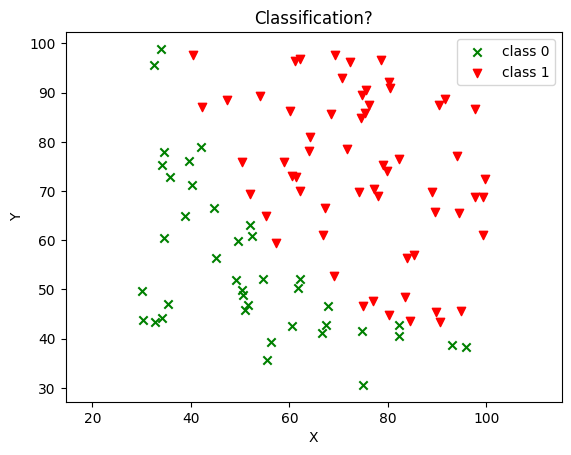

In [ ]:
group1 = df[df.label == 0]
group2 = df[df.label == 1]

plt.title("Classification?")
plt.xlabel('X')
plt.ylabel('Y')

plt.axis("equal")
plt.scatter(group1.x, group1.y, c='g', marker='x', label='class 0')
plt.scatter(group2.x, group2.y, c='r', marker='v', label='class 1')
plt.legend(loc='upper right')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg  = LogisticRegression()

# fit the model with data
logreg .fit(df[['x','y']], df.label)

LogisticRegression()

In [ ]:
#ข้อมูลไม่เคยพบมาก่อน Unknow data
x = 150
y = 0
answer = logreg.predict([[x, y]])
print("(%s , %s) อยู่คลาส => %s" % (x, y, answer[0]) )

(150 , 0) อยู่คลาส => 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
group1 = df[df.label == 0]
group2 = df[df.label == 1]

color = 'g' if answer == 0 else 'r'

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


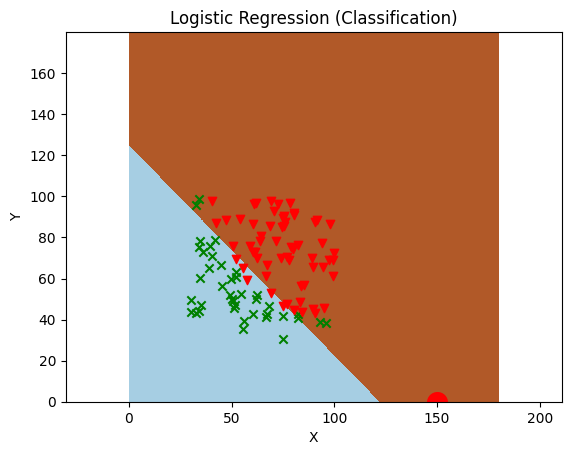

In [ ]:
plt.title("Logistic Regression (Classification)")
plt.xlabel('X')
plt.ylabel('Y')

plt.axis("equal")

x_min, x_max = 0, 180
y_min, y_max = 0, 180

h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.scatter(group1.x, group1.y, c='g', marker='x', label='class 0')
plt.scatter(group2.x, group2.y, c='r', marker='v', label='class 1')
plt.scatter(x, y, s=200, c=color, label='answer')

plt.show()

# Count Vector + LogisticRegression

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/amazon_cells_labelled.txt',
                 names=['sentence','label'],sep='\t')
print(df.head(20))

                                             sentence  label
0   So there is no way for me to plug it in here i...      0
1                         Good case, Excellent value.      1
2                              Great for the jawbone.      1
3   Tied to charger for conversations lasting more...      0
4                                   The mic is great.      1
5   I have to jiggle the plug to get it to line up...      0
6   If you have several dozen or several hundred c...      0
7         If you are Razr owner...you must have this!      1
8                 Needless to say, I wasted my money.      0
9                    What a waste of money and time!.      0
10                    And the sound quality is great.      1
11  He was very impressed when going from the orig...      1
12  If the two were seperated by a mere 5+ ft I st...      0
13                           Very good quality though      1
14  The design is very odd, as the ear "clip" is n...      0
15  Highly recommend for

In [ ]:
print(df.shape)
print(df.label.value_counts())

#Balancing data

(1000, 2)
0    500
1    500
Name: label, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

sentences = df['sentence'].values  #ทำการสร้าง Feature Vector
y = df['label'].values  #Class คำตอบ, Tarket, label


sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.20, random_state=1000)
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train) #Bag of Word

CountVectorizer()

In [ ]:
X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)


# print(X_train)
print(X_train.shape)
print(X_test.shape)


(800, 1595)
(200, 1595)


In [ ]:
#print feature names
#print(vectorizer.get_feature_names())
print(vectorizer.vocabulary_)

{'love': 837, 'the': 1377, 'look': 821, 'and': 79, 'feel': 535, 'of': 948, 'samsung': 1193, 'flipphones': 559, 'these': 1383, 'are': 97, 'certainly': 244, 'very': 1493, 'comfortable': 283, 'functionality': 594, 'is': 741, 'decent': 365, 'don': 418, 'think': 1388, 'it': 743, 'would': 1583, 'hold': 670, 'too': 1419, 'securly': 1212, 'on': 955, 'your': 1593, 'belt': 148, 'great': 627, 'phone': 1019, 'bottowm': 174, 'line': 804, 'another': 82, 'worthless': 1581, 'cheap': 254, 'gimmick': 607, 'from': 584, 'sprint': 1311, 'that': 1375, 'company': 292, 'joke': 754, 'then': 1380, 'had': 634, 'to': 1410, 'continue': 316, 'pairing': 994, 'periodically': 1015, 'since': 1260, 'somehow': 1288, 'kept': 762, 'dropping': 434, 'this': 1390, 'cable': 206, 'allows': 63, 'me': 861, 'connect': 307, 'any': 87, 'mini': 882, 'usb': 1475, 'device': 385, 'my': 914, 'pc': 1004, 'unfortunately': 1456, 'did': 388, 'not': 938, 'work': 1573, 'headset': 656, 'good': 621, 'item': 744, 'low': 840, 'price': 1065, 'was':

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)



score = classifier.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.8


In [ ]:
unknown = pd.DataFrame({'sentence': [
    "I love love love love this kitten",
    "I hate hate hate hate this keyboard",
    "I'm not sure how I feel about toast",
    "Did you see the baseball game yesterday?",
    "It is lovely, I like it",
    "Trashy television shows are some of my favorites",
    "I'm seeing a Kubrick film tomorrow, I hear not so great things about it.",
    "I find chirping birds irritating, but I know I'm not the only one",
]})

print(unknown)

                                            sentence
0                  I love love love love this kitten
1                I hate hate hate hate this keyboard
2                I'm not sure how I feel about toast
3           Did you see the baseball game yesterday?
4                            It is lovely, I like it
5   Trashy television shows are some of my favorites
6  I'm seeing a Kubrick film tomorrow, I hear not...
7  I find chirping birds irritating, but I know I...


In [ ]:
unknown_vectors = vectorizer.transform(unknown.sentence)
unknown_words_df = pd.DataFrame(unknown_vectors.toarray(), columns=vectorizer.get_feature_names_out())

In [ ]:
unknown_words_df.head(8)

,10,100,11,12,13,15,18,20,2000,2005,...,wow,wrong,wrongly,year,years,yes,yet,you,your,z500a
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Logistic Regression predictions + probabilities
unknown['class'] = classifier.predict(unknown_words_df)
unknown['pred_logreg_proba'] = classifier.predict_proba(unknown_words_df)[:,1]

print(unknown)

                                            sentence  class  pred_logreg_proba
0                  I love love love love this kitten      1           0.998792
1                I hate hate hate hate this keyboard      0           0.301784
2                I'm not sure how I feel about toast      0           0.086739
3           Did you see the baseball game yesterday?      0           0.454636
4                            It is lovely, I like it      1           0.566694
5   Trashy television shows are some of my favorites      0           0.481557
6  I'm seeing a Kubrick film tomorrow, I hear not...      0           0.429498
7  I find chirping birds irritating, but I know I...      0           0.062242


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


# Vector TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

document = ["The man went out for a walk", "The children sat around the fire", "The man sat around the water"]
print(document)


['The man went out for a walk', 'The children sat around the fire', 'The man sat around the water']


In [ ]:
#Repeat TfidfVectorizer
vectorizer = TfidfVectorizer()
sparse_matrix = vectorizer.fit_transform(document)
doc_term_matrix = sparse_matrix.todense()

print(doc_term_matrix)

[[0.         0.         0.         0.45050407 0.34261996 0.45050407
  0.         0.26607496 0.45050407 0.         0.45050407]
 [0.3564574  0.46869865 0.46869865 0.         0.         0.
  0.3564574  0.55364194 0.         0.         0.        ]
 [0.37420726 0.         0.         0.         0.37420726 0.
  0.37420726 0.58121064 0.         0.49203758 0.        ]]


In [ ]:
df = pd.DataFrame(doc_term_matrix,
                  columns = vectorizer.get_feature_names_out(),
                  index = ['docA', 'docB', 'docC'])
print(df)

        around  children      fire       for       man       out       sat  \
docA  0.000000  0.000000  0.000000  0.450504  0.342620  0.450504  0.000000   
docB  0.356457  0.468699  0.468699  0.000000  0.000000  0.000000  0.356457   
docC  0.374207  0.000000  0.000000  0.000000  0.374207  0.000000  0.374207   

           the      walk     water      went  
docA  0.266075  0.450504  0.000000  0.450504  
docB  0.553642  0.000000  0.000000  0.000000  
docC  0.581211  0.000000  0.492038  0.000000  


# TF-IDF+LogisticRegression

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes.csv',
                 names=['sentence','label'],sep = '\t')
print(df.head(5))

                                            sentence  label
0  Pregnancies,Glucose,BloodPressure,SkinThicknes...    NaN
1                      6,148,72,35,0,33.6,0.627,50,1    NaN
2                       1,85,66,29,0,26.6,0.351,31,0    NaN
3                       8,183,64,0,0,23.3,0.672,32,1    NaN
4                      1,89,66,23,94,28.1,0.167,21,0    NaN


In [ ]:
print(df.shape)
print(df.label.value_counts())

from sklearn.model_selection import train_test_split
sentences = df['sentence'].values
y = df['label'].values

(769, 2)
Series([], Name: label, dtype: int64)


In [ ]:
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.20, random_state=1000)
vectorizer_tfidf = TfidfVectorizer(max_features=1000)

In [ ]:
train_vector = vectorizer_tfidf.fit(sentences_train)
train_vector =  vectorizer_tfidf.transform(sentences_train)
doc_term_matrix = train_vector.todense()
print(vectorizer_tfidf.get_feature_names_out())
df = pd.DataFrame(doc_term_matrix,columns = vectorizer_tfidf.get_feature_names_out())
print(df)

In [ ]:
test_vector = vectorizer_tfidf.transform(sentences_test)
doc_term_matrix = test_vector.todense()
print(vectorizer_tfidf.get_feature_names_out())
df = pd.DataFrame(doc_term_matrix,columns = vectorizer_tfidf.get_feature_names_out())
print(df)

In [ ]:
%%time
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(train_vector, y_train)

score = classifier.score(test_vector, y_test)
print("Accuracy:", score)


y_predict = classifier.predict(test_vector)
print(y_predict)
print(y_test)

ValueError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y_predict, y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

NameError: ignored

# TF-IDF-Naive Bay

In [ ]:
from sklearn.naive_bayes import MultinomialNB

classifier_NB = MultinomialNB()
classifier_NB.fit(train_vector, y_train)

y_predict = classifier_NB.predict(test_vector)

score = classifier_NB.score(test_vector, y_test)
print("Accuracy:", score)
print(y_predict, y_test)


from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_predict, y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
from sklearn.metrics import confusion_matrix,precision_score
import seaborn as sns; sns.set()

mat = confusion_matrix(y_predict, y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');


# TF-IDF KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3, weights='distance')
knn.fit(train_vector, y_train)

In [ ]:
y_predict = knn.predict(test_vector)

score = knn.score(test_vector, y_test)
print("Accuracy:", score)
print(y_predict, y_test)

In [ ]:
mat = confusion_matrix(y_predict, y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

precision = precision_score(y_test, y_predict, average='binary')
print('Precision: %.3f' % precision)

